In [67]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [69]:
df=pd.read_csv("data.csv")
print("Original DataFrame:")
print(df.head())
print(df.info())
print(df.describe())

Original DataFrame:
   Unnamed: 0.1  Unnamed: 0   brand                                  name  \
0             0           0      HP      Victus 15-fb0157AX Gaming Laptop   
1             1           1      HP                   15s-fq5007TU Laptop   
2             2           2    Acer                  One 14 Z8-415 Laptop   
3             3           3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop   
4             4           4   Apple       MacBook Air 2020 MGND3HN Laptop   

   price  spec_rating                      processor  \
0  49900    73.000000      5th Gen AMD Ryzen 5 5600H   
1  39900    60.000000   12th Gen Intel Core i3 1215U   
2  26990    69.323529  11th Gen Intel Core i3 1115G4   
3  59729    66.000000   12th Gen Intel Core i5 1240P   
4  69990    69.323529                       Apple M1   

                              CPU   Ram Ram_type    ROM ROM_type  \
0           Hexa Core, 12 Threads   8GB     DDR4  512GB      SSD   
1  Hexa Core (2P + 4E), 8 Threads   8GB     

In [71]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print("\nDataFrame after dropping the column:") 
print(df.head())
print(df.info())
print(df.describe())


DataFrame after dropping the column:
   Unnamed: 0.1   brand                                  name  price  \
0             0      HP      Victus 15-fb0157AX Gaming Laptop  49900   
1             1      HP                   15s-fq5007TU Laptop  39900   
2             2    Acer                  One 14 Z8-415 Laptop  26990   
3             3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop  59729   
4             4   Apple       MacBook Air 2020 MGND3HN Laptop  69990   

   spec_rating                      processor                             CPU  \
0    73.000000      5th Gen AMD Ryzen 5 5600H           Hexa Core, 12 Threads   
1    60.000000   12th Gen Intel Core i3 1215U  Hexa Core (2P + 4E), 8 Threads   
2    69.323529  11th Gen Intel Core i3 1115G4            Dual Core, 4 Threads   
3    66.000000   12th Gen Intel Core i5 1240P  12 Cores (4P + 8E), 16 Threads   
4    69.323529                       Apple M1             Octa Core (4P + 4E)   

    Ram Ram_type    ROM ROM_type          

In [73]:
df.isnull().head()

,Unnamed: 0.1,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.duplicated().sum()

0

<Axes: >

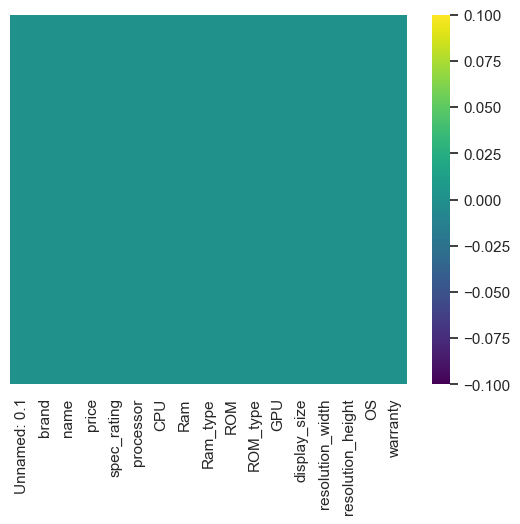

In [77]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [79]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Unnamed: 0.1' has '893' unique values
Feature 'brand' has '30' unique values
Feature 'name' has '815' unique values
Feature 'price' has '464' unique values
Feature 'spec_rating' has '30' unique values
Feature 'processor' has '184' unique values
Feature 'CPU' has '29' unique values
Feature 'Ram' has '7' unique values
Feature 'Ram_type' has '12' unique values
Feature 'ROM' has '7' unique values
Feature 'ROM_type' has '2' unique values
Feature 'GPU' has '134' unique values
Feature 'display_size' has '18' unique values
Feature 'resolution_width' has '18' unique values
Feature 'resolution_height' has '22' unique values
Feature 'OS' has '14' unique values
Feature 'warranty' has '4' unique values


Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

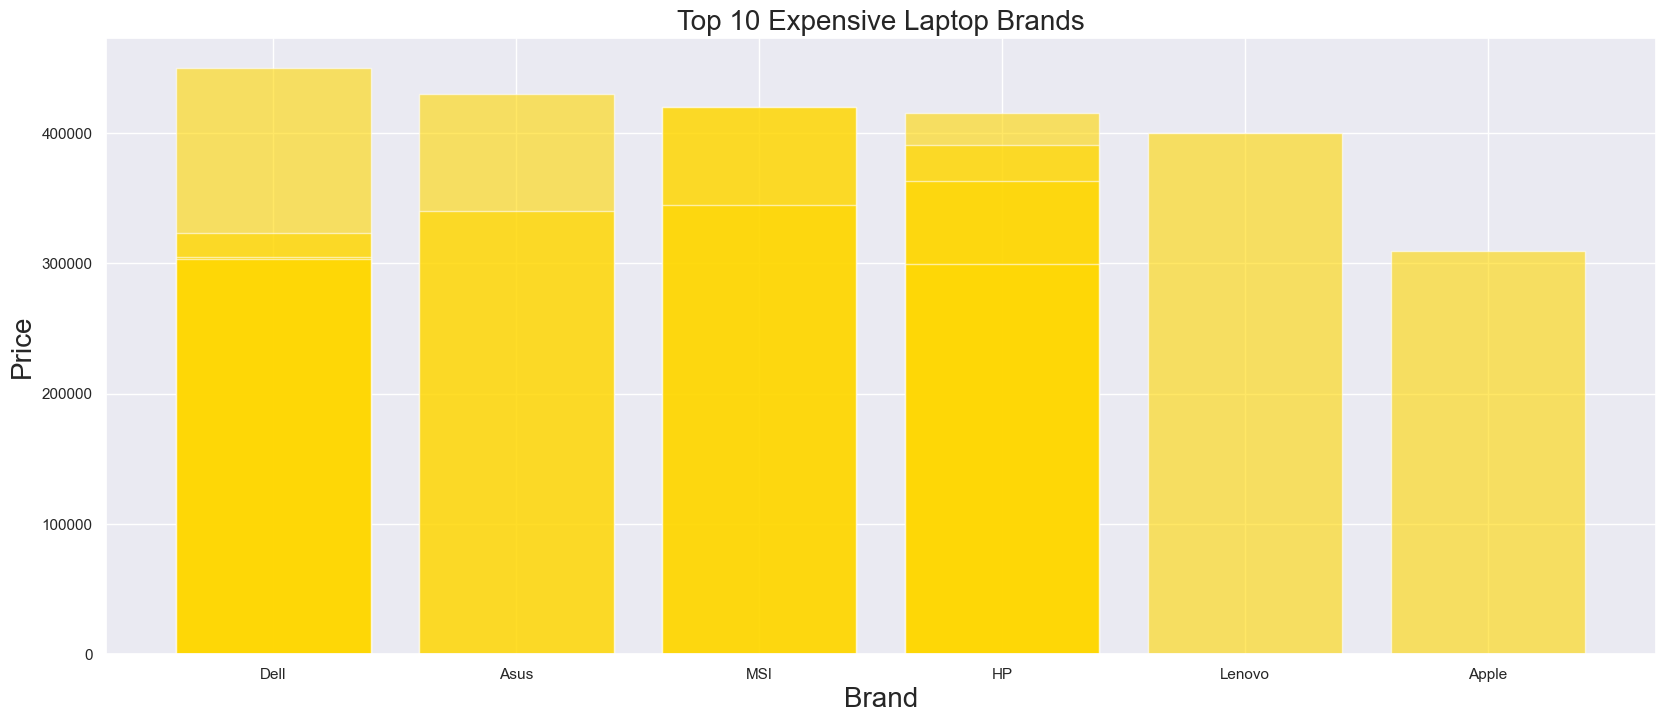

In [81]:
top10 = df.nlargest(15,'price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 20)
plt.xlabel("Brand", fontsize = 20)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

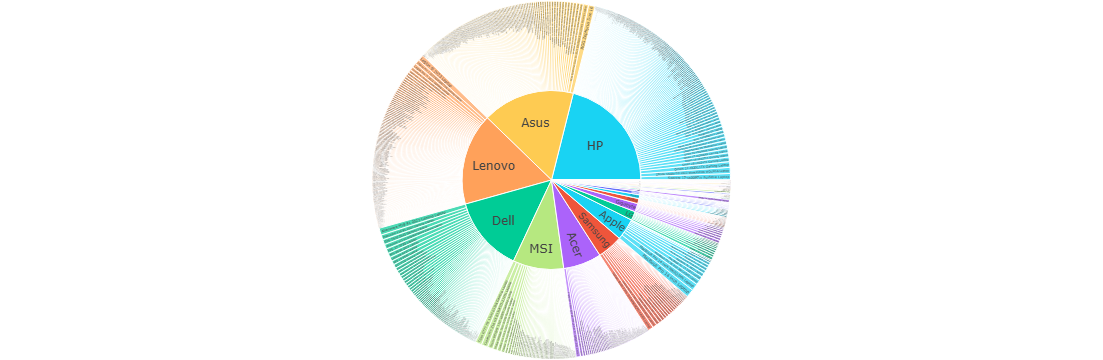

In [83]:
import plotly.express as px
fig = px.sunburst(df, path=['brand', 'name'], values='price',color='brand')
fig.update_layout(margin = dict(t=1, l=1, r=1, b=1))

fig.show()


Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

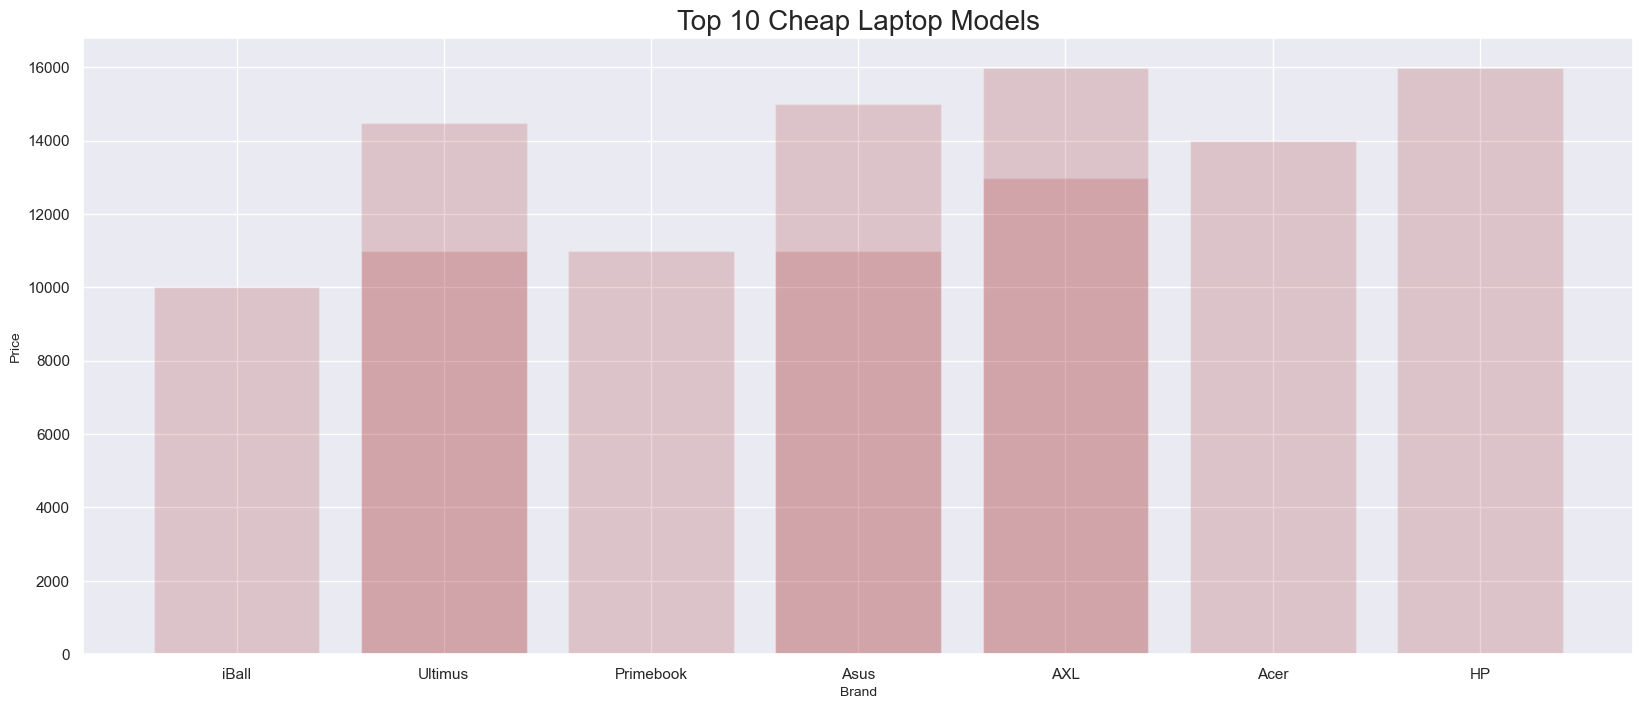

In [85]:
top10 = df.nsmallest(10,'price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)

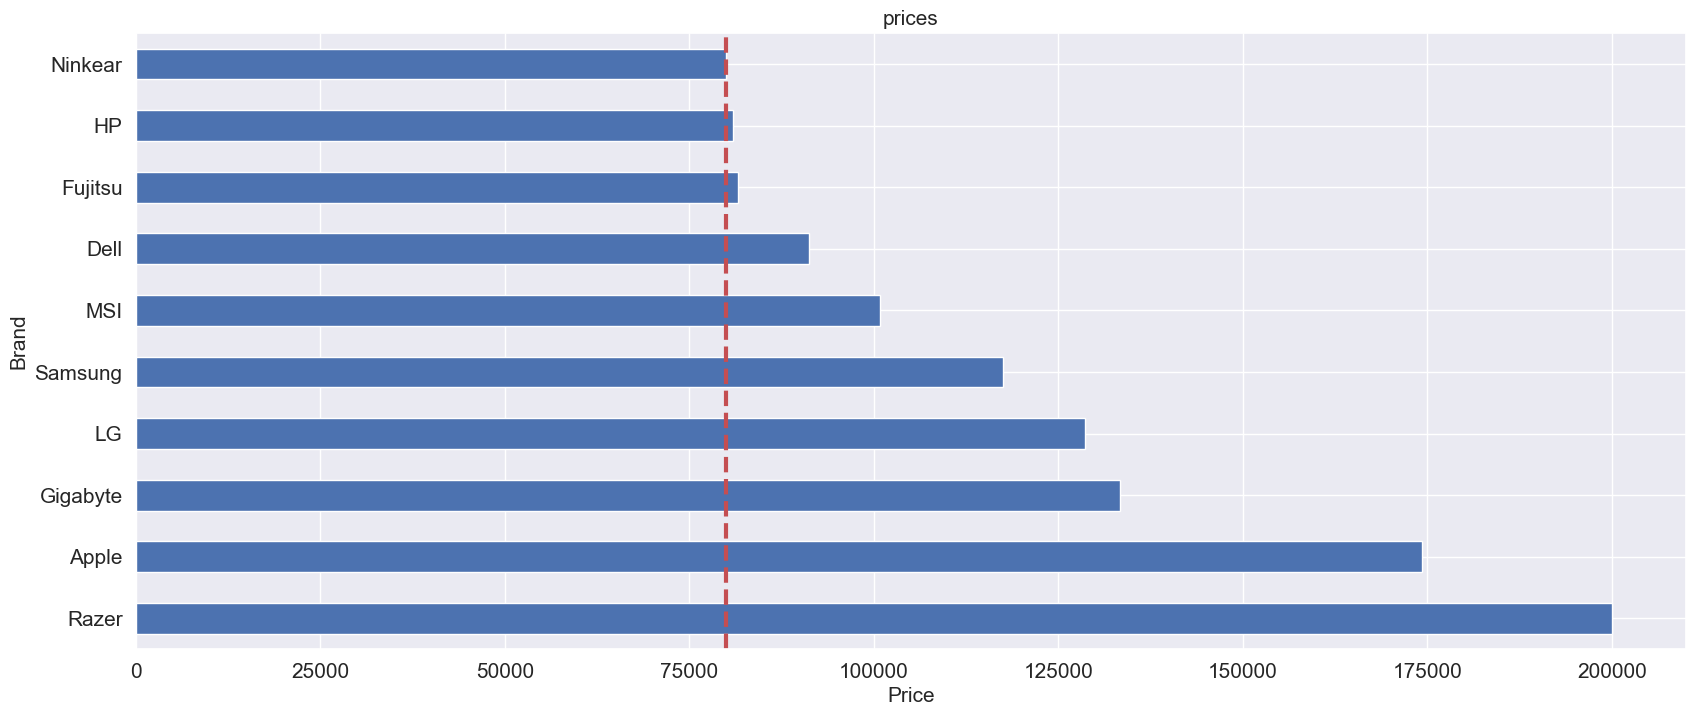

In [87]:
df[['brand','price']].groupby('brand').mean().sort_values(by='price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8), 
        fontsize = 15, rot =0, legend = None)
plt.axvline(df['price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [89]:
df.columns

Index(['Unnamed: 0.1', 'brand', 'name', 'price', 'spec_rating', 'processor',
       'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [91]:
numeric=['price','spec_rating']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

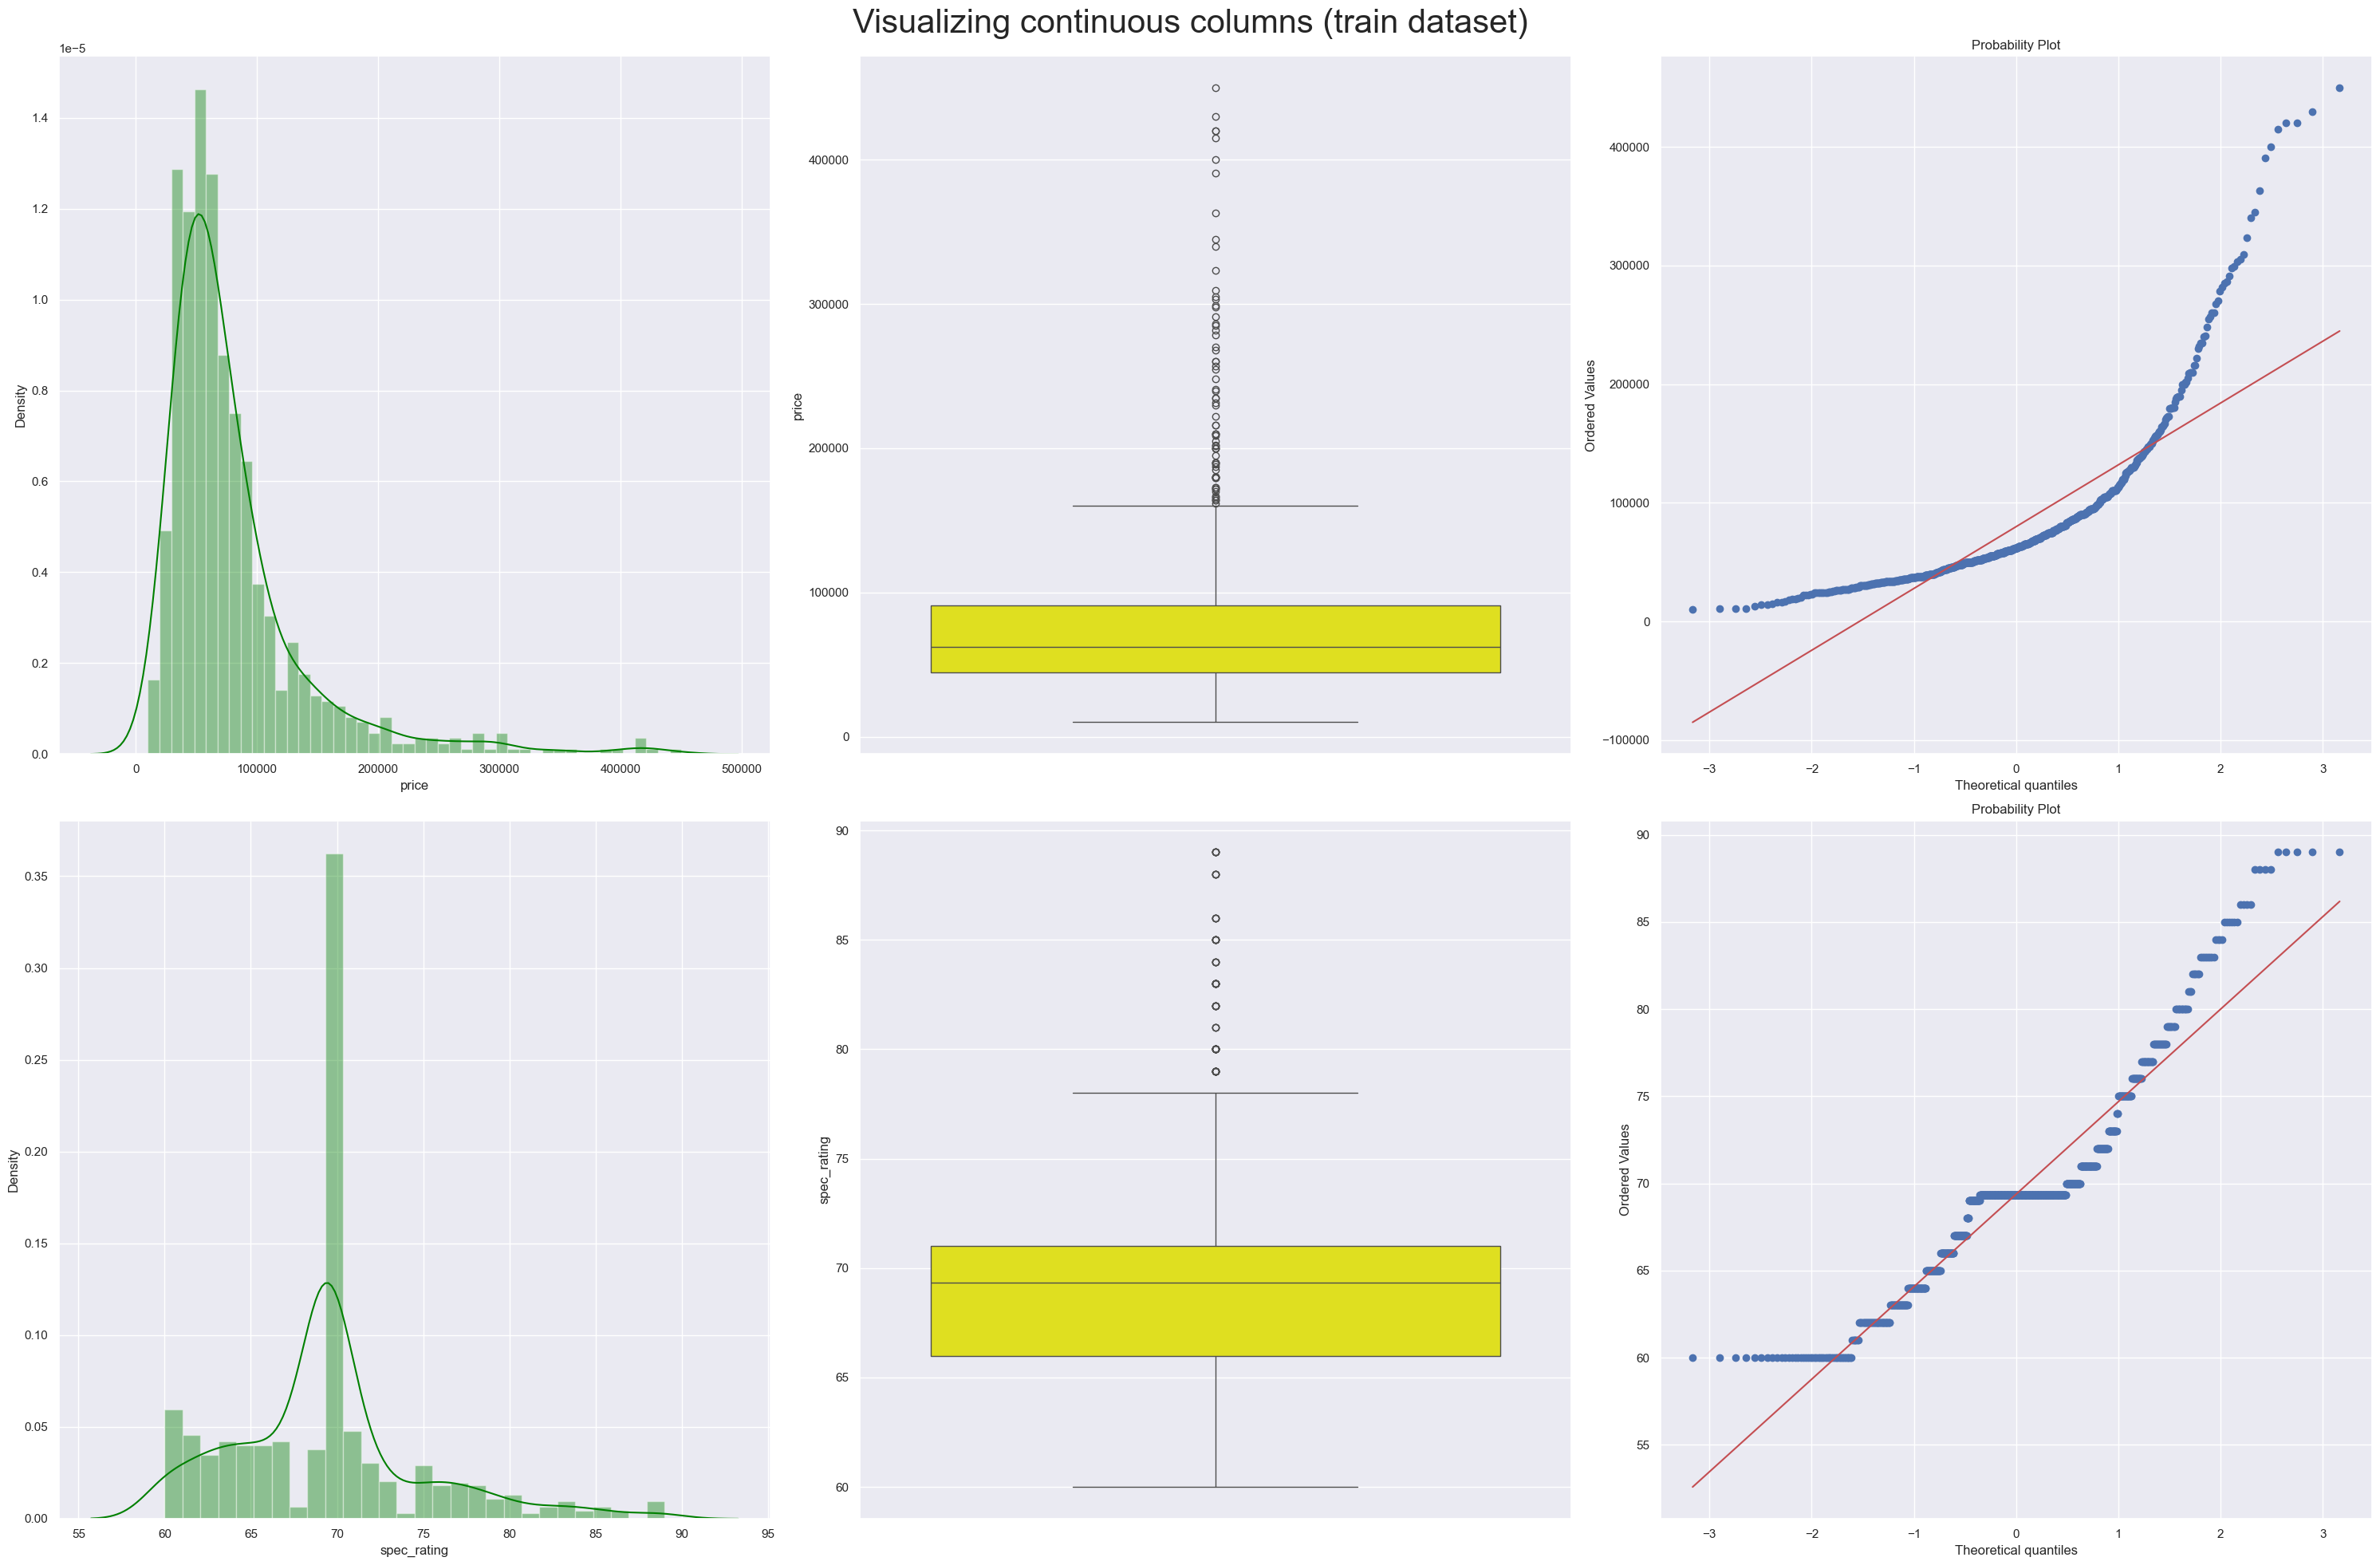

In [93]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

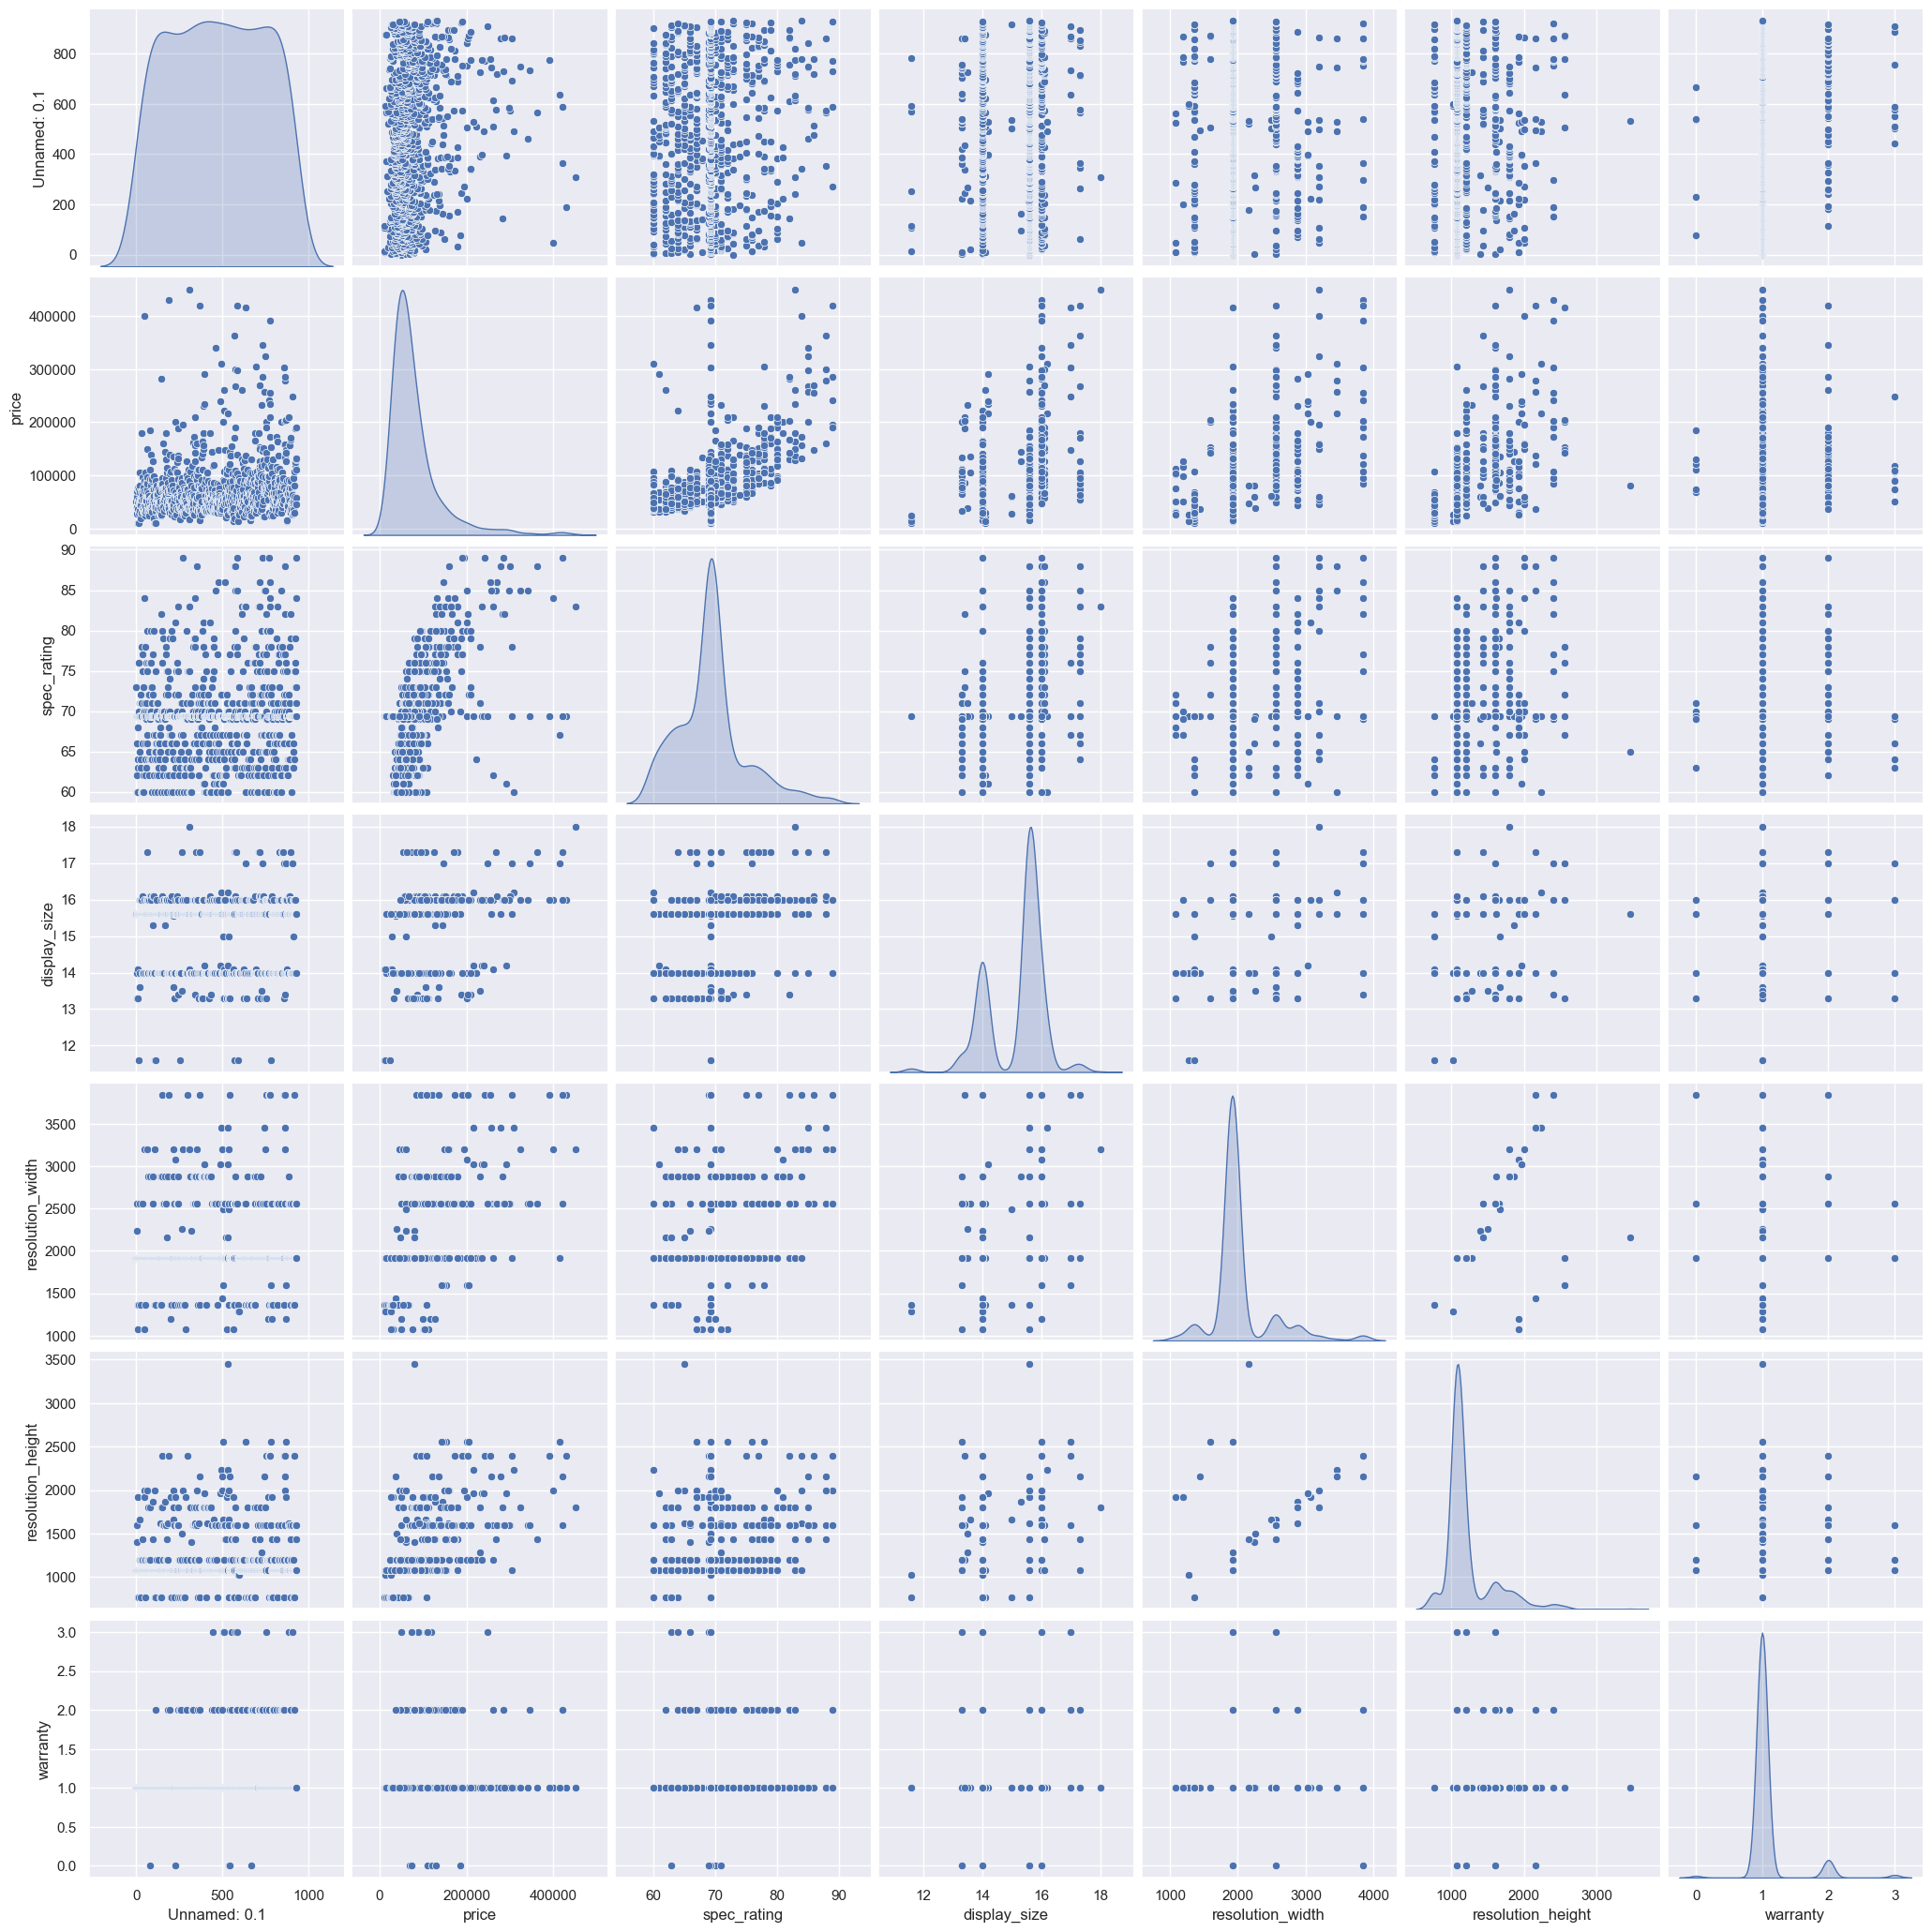

In [95]:
sns.set()
sns.pairplot(df,height = 3,kind ='scatter',diag_kind='kde')
plt.show()

On the graphs presented, it is easy to see the linear correlation of the ratings and price.

Analyzing categorical variables

In [133]:
categorical_features=['brand', 'name',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty']

<Figure size 2500x4500 with 0 Axes>

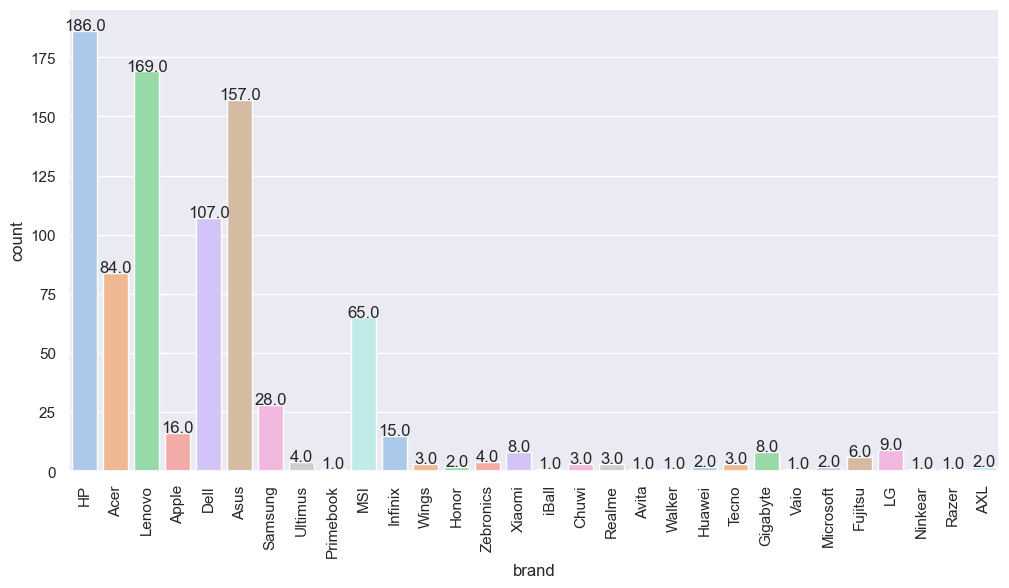

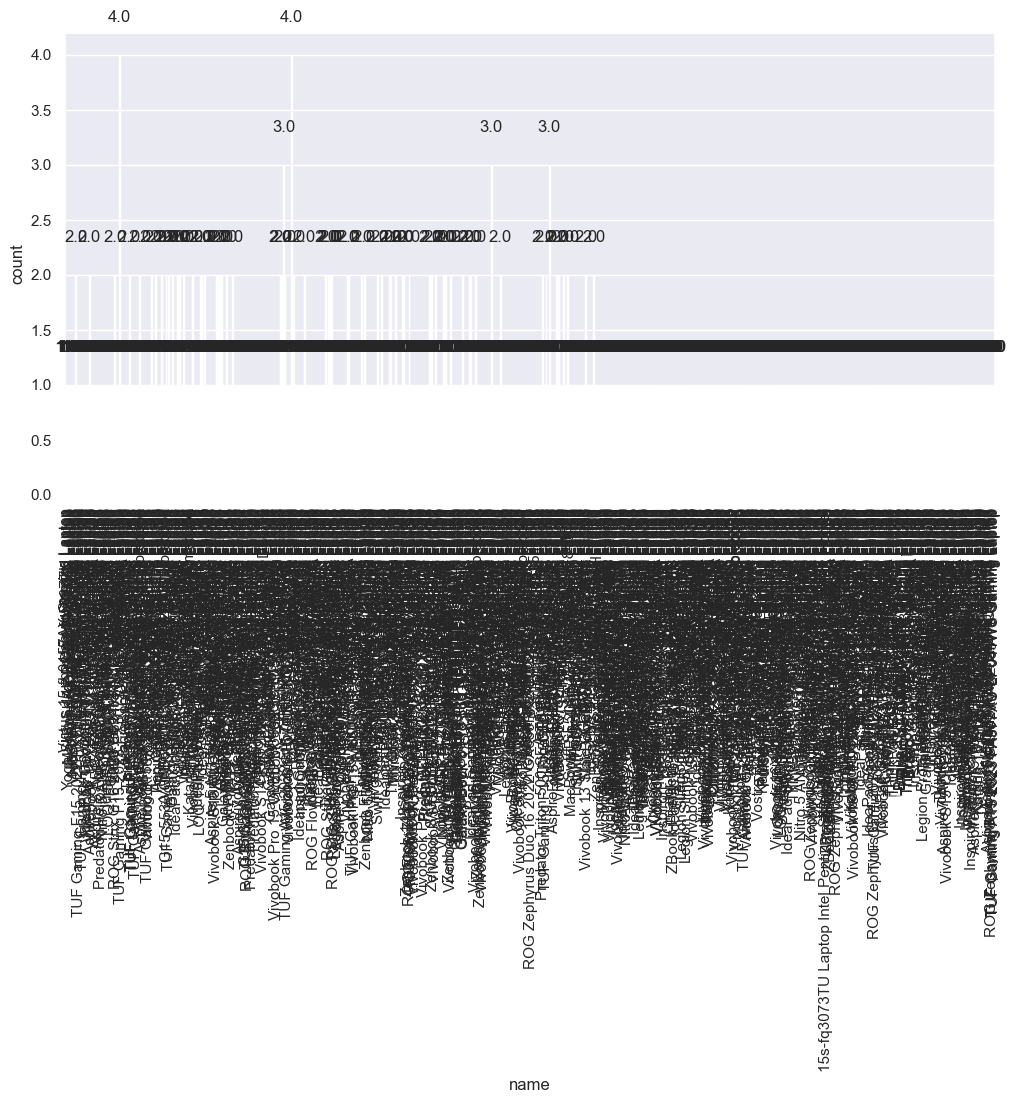

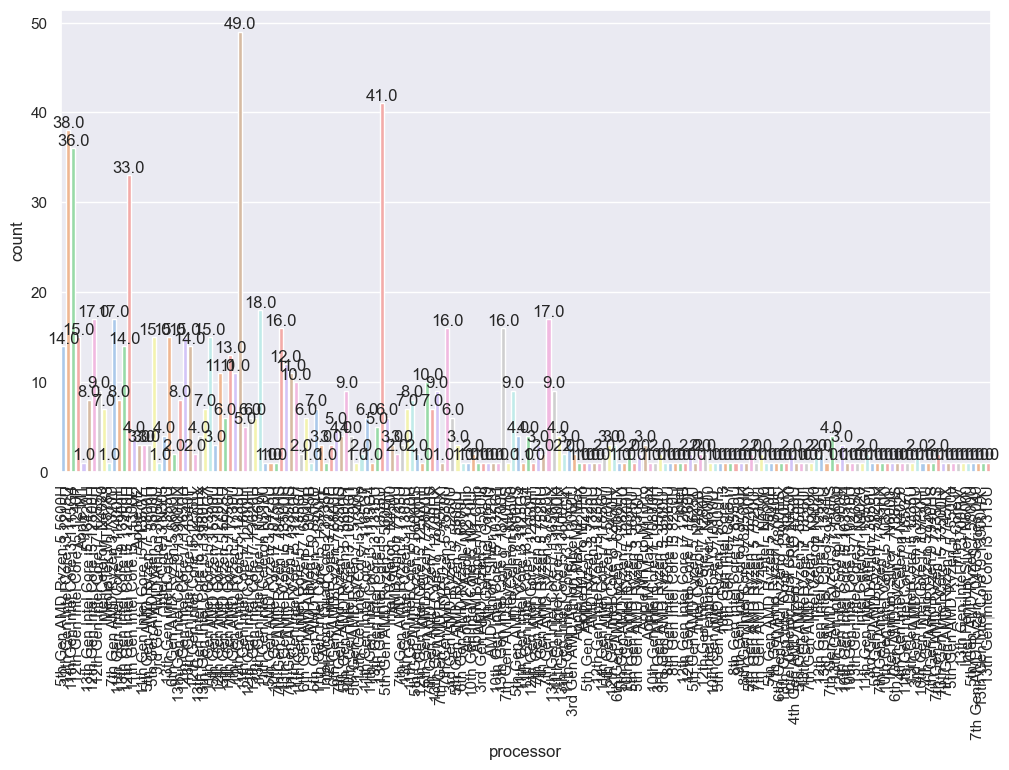

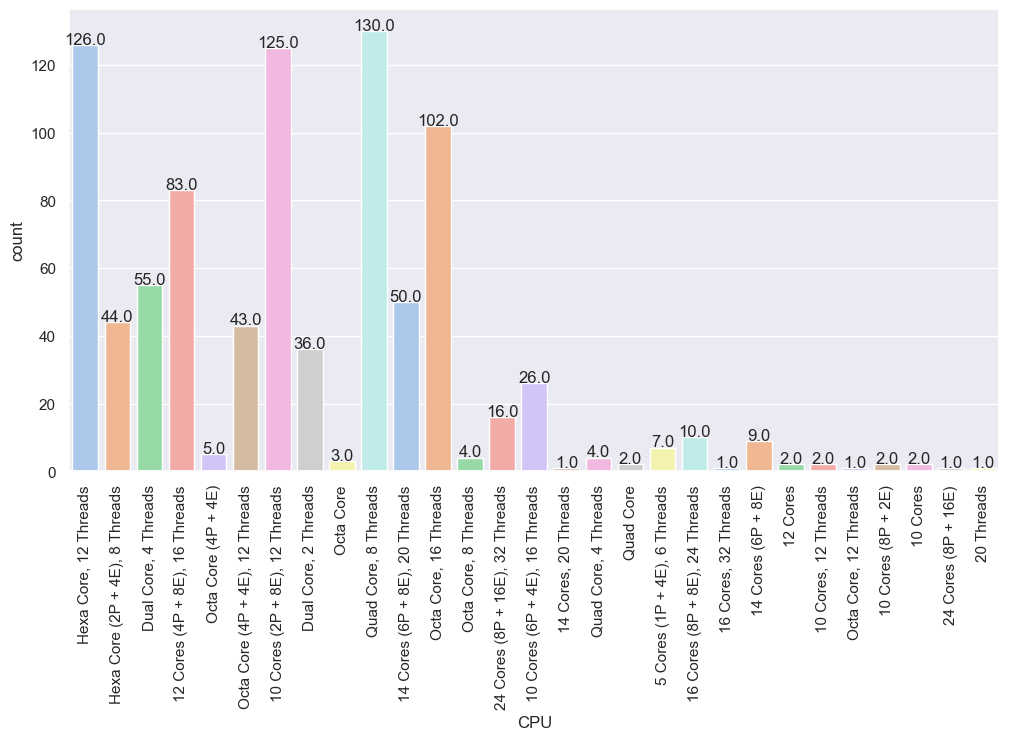

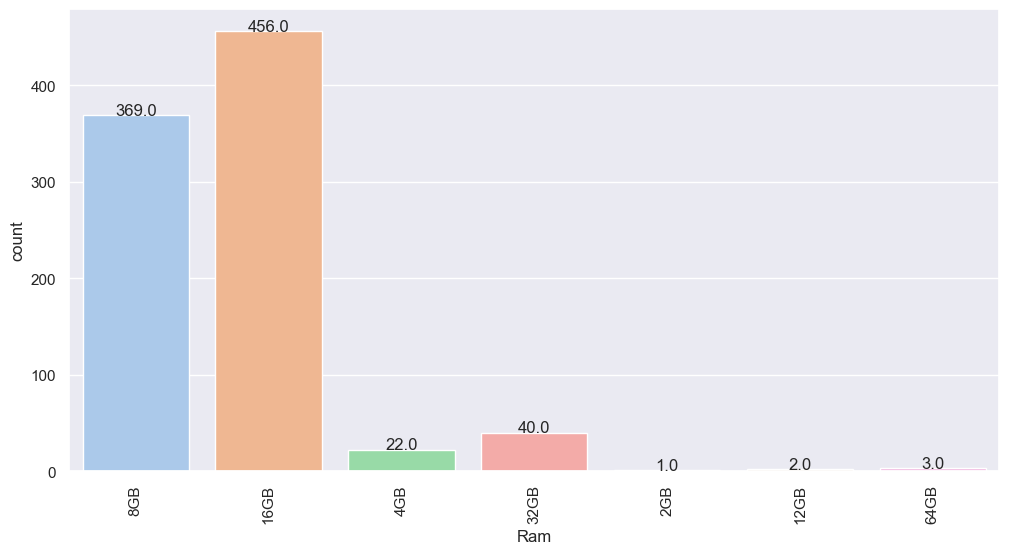

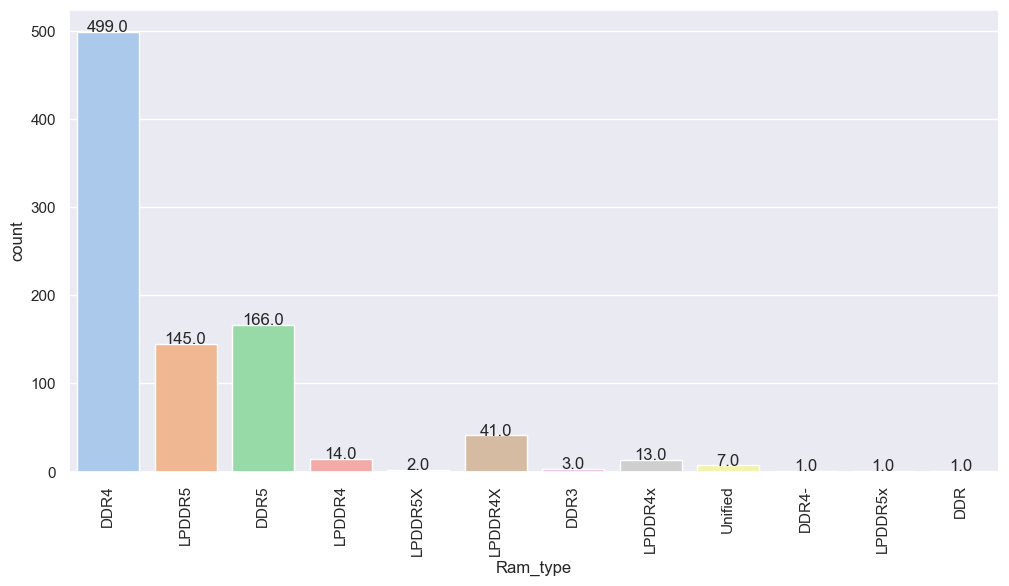

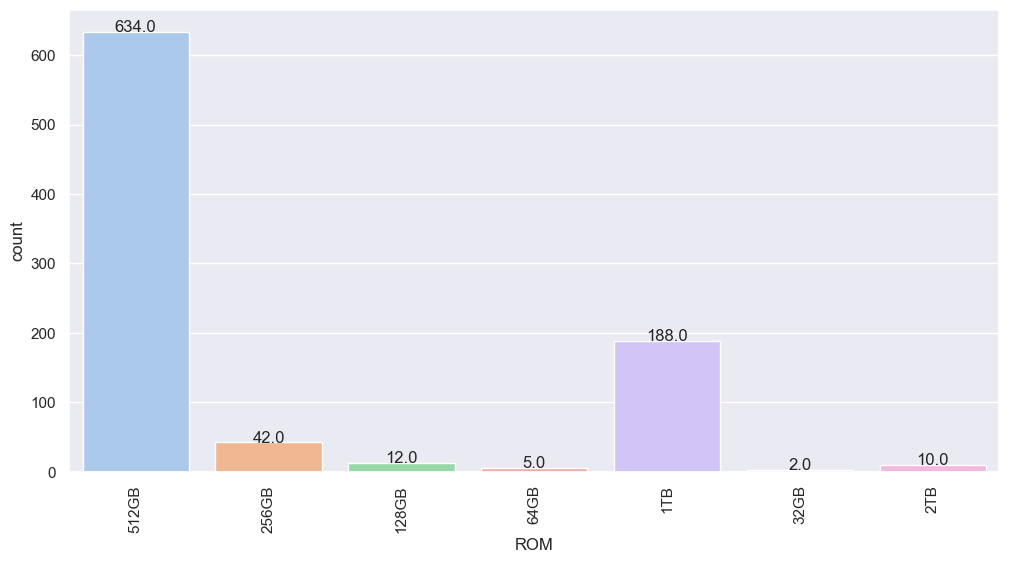

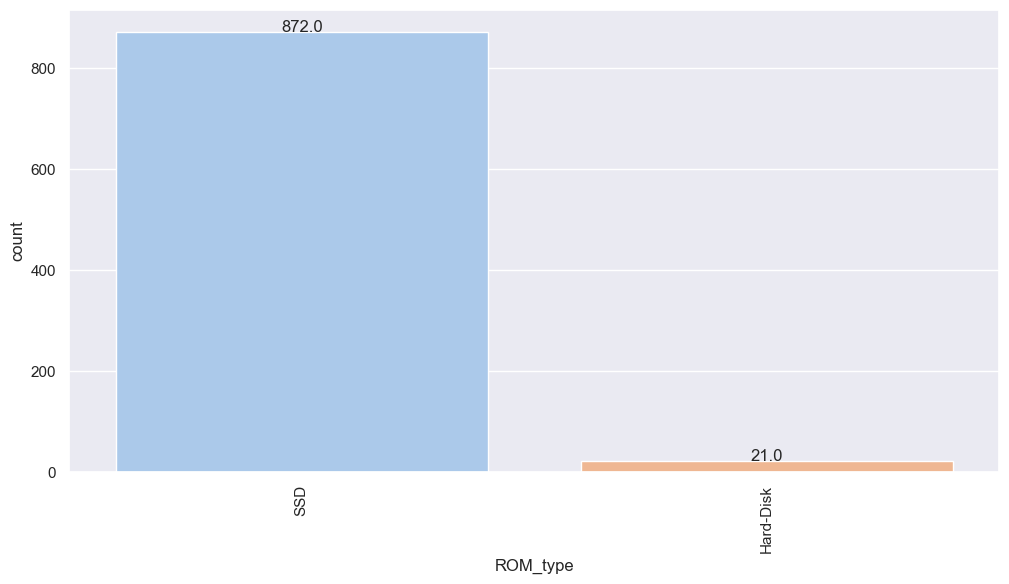

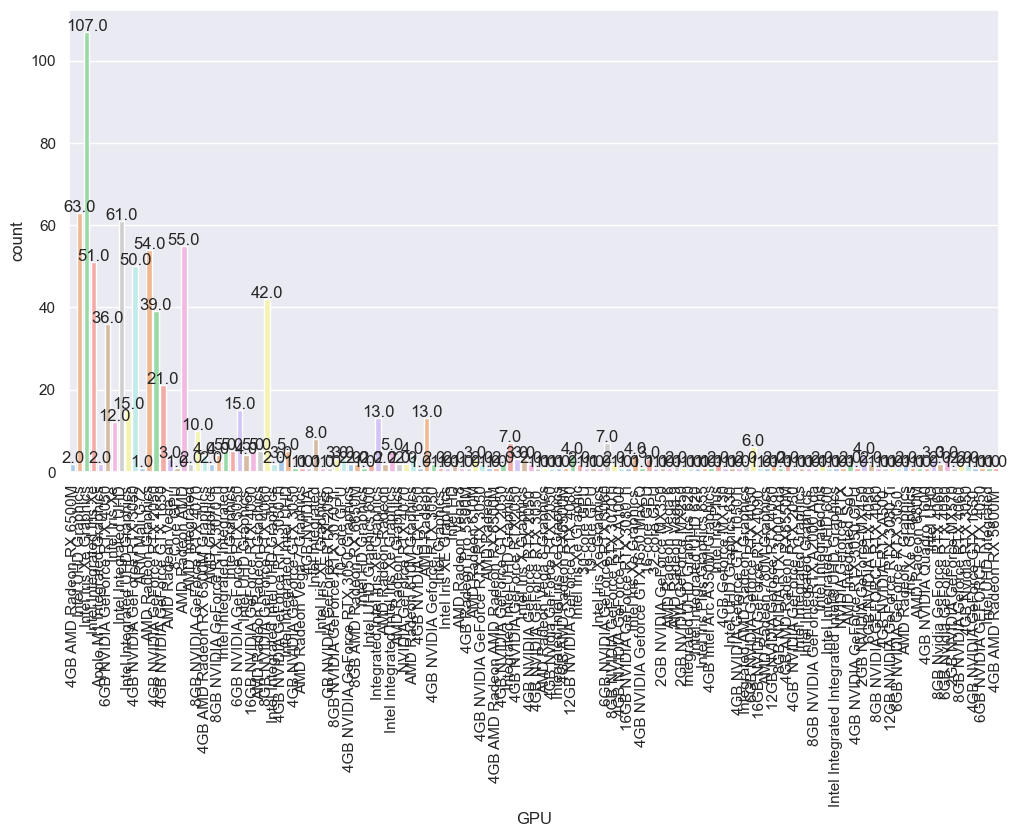

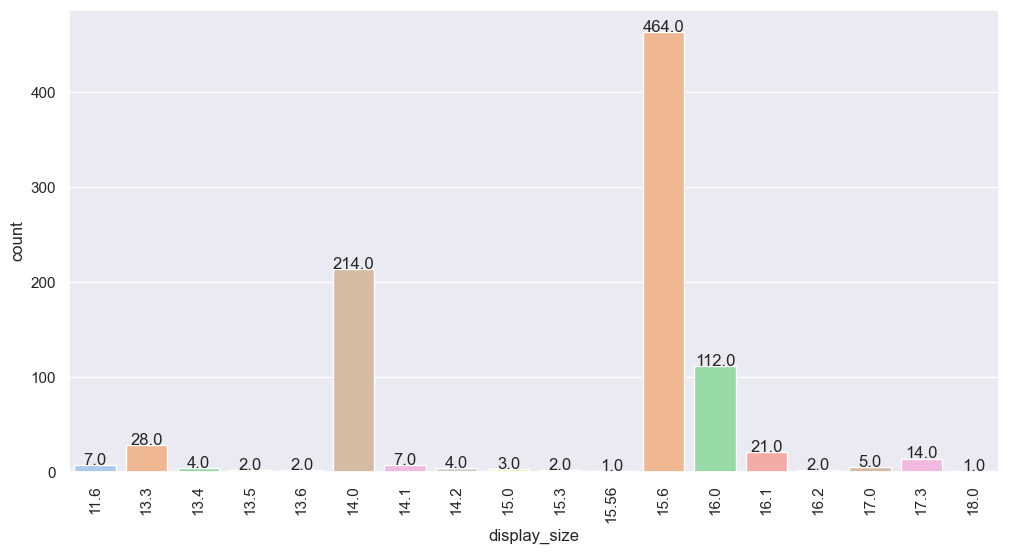

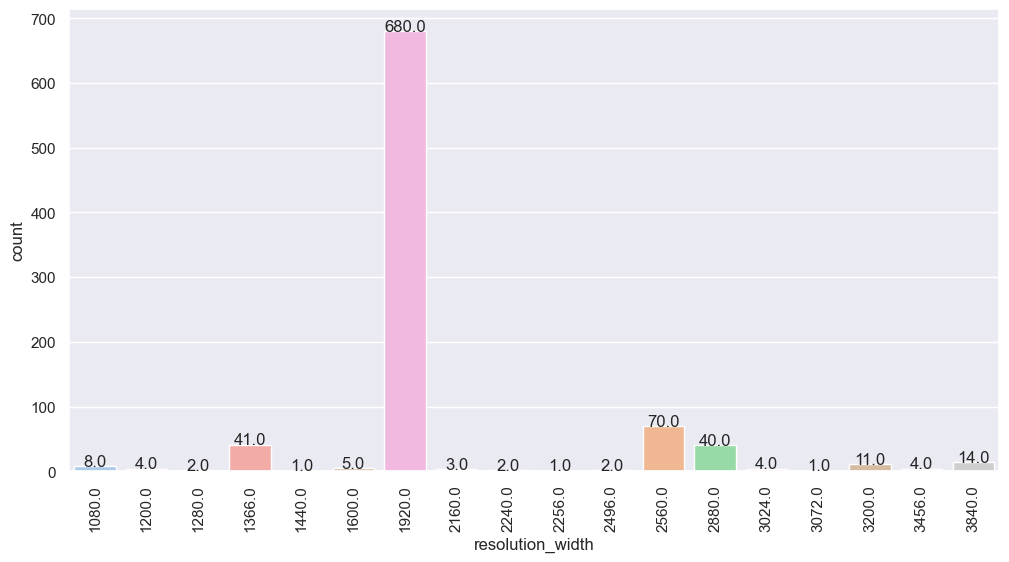

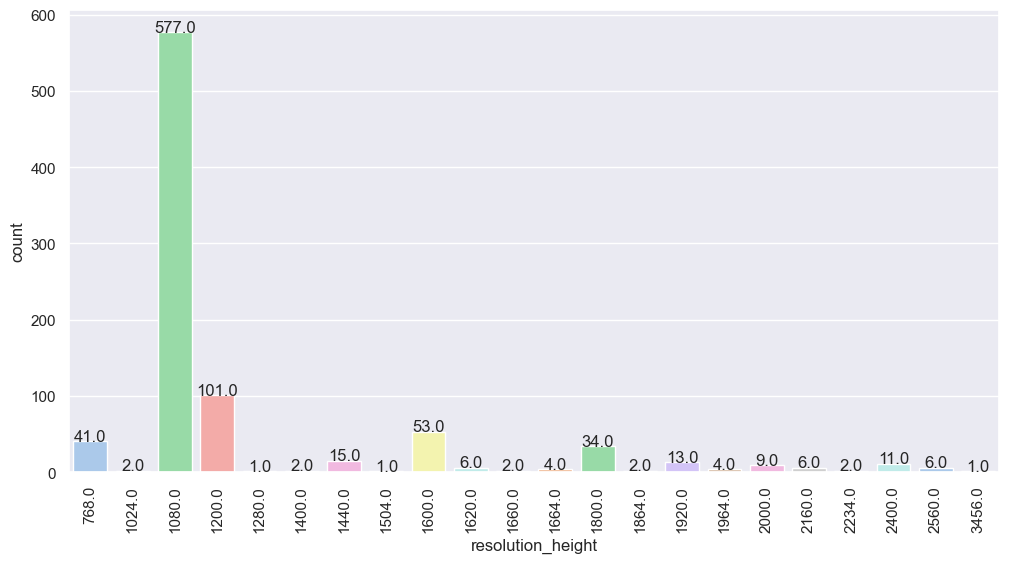

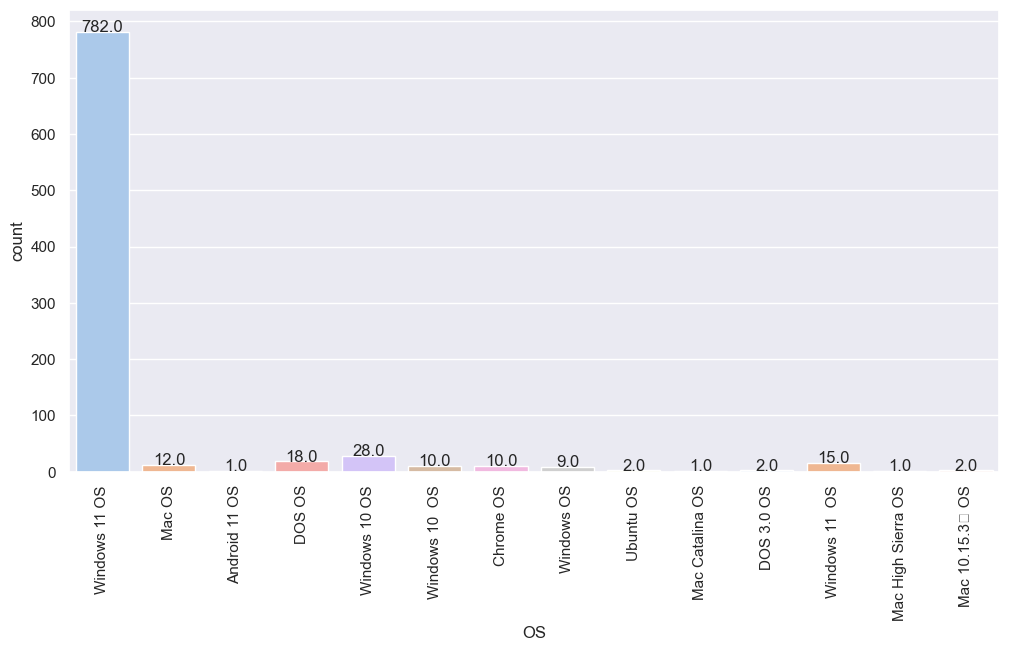

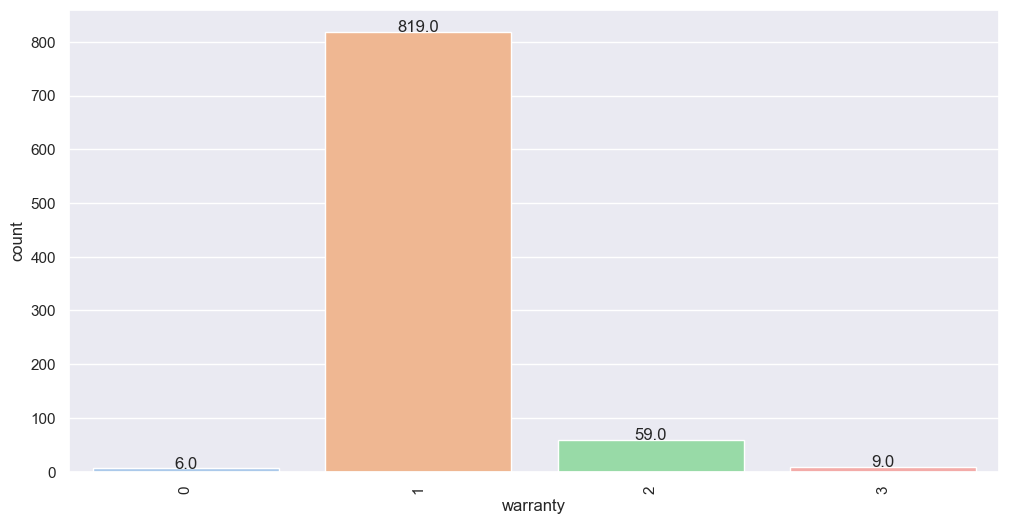

In [137]:
i=1
plt.figure(figsize = (25,45))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = df,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")
  i+=1

In [103]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_name=label_encoder.fit_transform(df['name'])
df_name

array([647,  38, 440, 784, 378, 159, 299, 411, 688, 198, 612, 486, 533,
        60, 617, 539, 395, 809, 630, 248, 706, 379,  99,  31, 708,  26,
        58, 156,  88, 312, 259, 476, 646, 102, 410, 458, 658, 275, 211,
       350,  41, 162, 197, 224, 498, 362, 416, 306, 629, 535, 606,  56,
       387, 604, 628, 795, 568,  19, 538, 544, 348, 373, 547, 325, 691,
       209, 666,  96, 509, 712, 175, 215, 537, 306, 707, 474, 417, 488,
        40, 523, 659, 627, 104, 558, 212, 431, 554, 352, 441, 665, 167,
        42, 540, 631, 419, 375, 196, 318, 298, 247, 418, 143, 672,   8,
       392, 155, 687, 261, 796, 487, 123, 342,  46, 567, 704, 587, 635,
       653, 274, 651, 349, 399, 256, 393, 131,  30, 457, 266, 207, 464,
        93,  80, 689, 755, 639, 763, 124,  71, 471, 184, 214, 193, 220,
       208, 744, 659, 782, 804, 308, 475, 642, 101, 295, 253, 741,  98,
       665, 329, 375, 690, 683, 456, 166, 531, 501, 709,  42,  17, 479,
       459, 481, 107, 480, 453, 692, 405, 406, 174, 751, 755,  1

In [105]:
df_nam=pd.DataFrame(df_name)
df_nam

,0
0,647
1,38
2,440
3,784
4,378
...,...
888,697
889,528
890,506
891,534


In [107]:
#processsor
df_processor=label_encoder.fit_transform(df['processor'])
df_processor

array([105,  34,  15,  39, 160,  39,  34,  61,  42,  39,  45, 171,  42,
       182, 126,  26,  15,  75,  40,  20, 105, 164,  40,  24, 111, 104,
        83, 177,  39,  66, 119,  76, 105, 104,  48,  59,  26,  40,  34,
        40,  15,  42,  38,  34,  62,  79,  23,  94,  40,  51, 171, 107,
        40,  94,  40,  27, 135,  37,  30,  52,  70,  75,  42,  68,  48,
        27,  15,  40,  42,  40,  30,  13,  26,  95, 105,  10, 139,  37,
        34,  63, 139, 132,  23,  19,  37, 139,  19,  61,  18,  15,  62,
        34,  26,  40, 120, 164,  37,  39,  37,  20, 120, 157,  23,  97,
        21, 170,  35, 122,  34,  37, 171,  63,  37, 135,  75,  45,  40,
       146,  40, 146,  40,  34, 100,  27,   1, 109,  60,  28,  14,  45,
        56,  58,  37,  63, 101, 107, 173, 126,  58,  66,   1,  75, 156,
        27, 122, 139, 137,  42,  55,  76, 105,  27,  58,  22, 106,  40,
        15,  59, 164,  43, 114,  60,  62, 136,  79,  40,  34,  58,  74,
       107,  74,  22,  74,  34,  34, 132, 136,  30, 114,  63, 12

In [111]:
df_processo=pd.DataFrame(df_processor)
df_processo

,0
0,105
1,34
2,15
3,39
4,160
...,...
888,80
889,122
890,143
891,73


In [113]:
df_CPU=label_encoder.fit_transform(df['CPU'])
df_CPU

array([19, 18, 17,  6, 21,  6, 18, 22,  6,  6,  1, 16,  6, 20, 28, 19, 17,
        8, 22, 28, 19, 21, 22, 28, 24, 19, 16, 25,  6,  1, 19, 14, 19, 19,
        2,  6, 19, 22, 18, 22, 17,  6,  1, 18,  2, 14, 28, 28, 22,  8, 16,
       19, 22, 28, 22, 28, 24,  1, 24,  9,  2,  8,  6,  6,  2, 28, 17, 22,
        6, 22, 24, 27, 19, 28, 19, 19, 24,  1, 18,  6, 24, 19, 28, 19,  1,
       24, 19, 22, 28, 17,  2, 18, 19, 22, 24, 21,  1,  6,  1, 28, 24, 16,
       28, 19, 28, 26,  1, 24, 18,  1, 16,  6,  1, 24,  8,  1, 22, 19, 22,
       19, 22, 18, 19, 28, 17, 24,  6, 28, 17,  1, 18,  1,  1,  6, 19, 19,
       16, 28,  1,  1, 17,  8, 16, 28, 24, 24, 24,  6, 15, 14, 19, 28,  1,
       28, 19, 22, 17,  6, 21,  6, 24,  6,  2, 24, 14, 22, 18,  1, 10, 19,
       10, 28, 10, 18, 18, 19, 24, 24, 24,  6, 28, 11, 19, 19, 28,  2, 25,
        1,  1,  6, 19,  6, 19, 19,  1,  1, 28, 24, 17, 18,  1, 19, 17, 19,
       24, 17, 20,  6,  6, 17, 28, 28, 28, 21, 28, 20, 22,  1, 19, 18, 24,
       16, 18, 28, 22, 19

In [115]:
df_CP=pd.DataFrame(df_CPU)
df_CP

,0
0,19
1,18
2,17
3,6
4,21
...,...
888,18
889,24
890,24
891,8


In [119]:
df_Ram=label_encoder.fit_transform(df['Ram'])
df_Ram

array([6, 6, 6, 1, 6, 6, 6, 1, 6, 1, 1, 4, 1, 4, 6, 6, 6, 3, 1, 6, 6, 6,
       1, 1, 1, 1, 4, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 1, 1, 6,
       1, 3, 6, 6, 1, 1, 6, 6, 1, 6, 6, 1, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6, 1, 6, 1, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1, 6,
       1, 6, 1, 6, 1, 1, 1, 6, 6, 1, 6, 6, 1, 6, 6, 6, 1, 2, 6, 6, 6, 6,
       4, 3, 6, 6, 1, 1, 6, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 4, 6, 1, 1, 6, 3, 6, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 1,
       6, 1, 6, 1, 6, 1, 1, 1, 6, 1, 1, 1, 6, 1, 1, 6, 1, 6, 1, 6, 6, 1,
       1, 1, 1, 1, 6, 3, 1, 1, 6, 1, 6, 1, 6, 1, 6, 6, 1, 1, 6, 6, 6, 1,
       6, 6, 6, 6, 6, 1, 1, 6, 6, 1, 1, 6, 6, 6, 6, 6, 6, 3, 1, 6, 6, 6,
       1, 6, 6, 6, 6, 6, 1, 1, 1, 1, 6, 1, 6, 1, 6, 6, 1, 1, 6, 6, 6, 6,
       1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 0, 1, 6, 6, 6, 6, 1, 1, 6, 1, 1, 6,
       6, 1, 6, 6, 6, 1, 1, 6, 1, 6, 1, 1, 1, 6, 1, 6, 1, 6, 1, 1, 6, 6,
       6, 1, 5, 1, 1, 4, 6, 6, 6, 1, 6, 1, 1, 1, 6,

In [121]:
df_Ra=pd.DataFrame(df_Ram)
df_Ra

,0
0,6
1,6
2,6
3,1
4,6
...,...
888,6
889,1
890,3
891,1


In [123]:
df_RameType=label_encoder.fit_transform(df['Ram_type'])
df_RameType

array([ 2,  2,  2,  8,  2,  2,  2,  4,  2,  8,  2,  2,  2,  5,  8,  2,  2,
        9,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  2,  2,  2,  4,  2,  2,
        2,  2,  2,  8,  6,  4,  2,  4,  5,  2,  4,  4,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  6,  2,  2,  2,  4,  4,  4,  4,  8,  2,  6,  2,  2,
        4,  2,  2,  6,  2,  2,  2,  2,  4,  2,  2,  8,  4,  4,  2,  2,  6,
        4,  2,  4,  2,  2,  4,  2,  2,  2,  4,  2,  5,  4,  2,  2,  4,  2,
        2,  2,  2,  1,  2,  2,  2,  2,  5,  4,  2,  2,  2,  2,  2,  4,  8,
        4,  4,  2,  2,  2,  2,  2,  2,  2,  6,  2,  8,  2,  2,  8,  2,  2,
        7,  8,  2,  7,  6,  8,  8,  6,  8,  4,  4,  8,  2,  4,  2,  2,  8,
        2,  2,  2,  2,  8,  2,  2,  2,  2,  4,  4,  4,  2,  2,  2,  4,  2,
        4,  6,  4,  2,  2,  4,  4,  2,  2,  8,  2,  4,  2,  2,  2,  4,  8,
        2,  7,  7,  2,  8,  2,  2,  2,  2,  2,  4,  2,  2,  2,  2,  2,  2,
        4,  2, 11,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,  2,  4,
        8,  2,  6,  2,  4

In [129]:
df_RamTyp=pd.DataFrame(df_RameType)
df_RamTyp

,0
0,2
1,2
2,2
3,8
4,2
...,...
888,2
889,0
890,4
891,2


In [131]:
df_OS=label_encoder.fit_transform(df['OS'])
df_OS


array([12, 12, 12, 12,  7, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12, 12, 12,
       12, 12, 12, 12,  7, 12, 12, 12, 12,  3, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  7, 12, 12, 12, 12, 12, 12,
       12, 12,  9, 10, 12, 12, 12, 12,  1, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12,  7, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12,  7, 12, 12, 12,  9, 10,  8,  7, 10,  5, 12,  3, 12, 12, 12,
       12, 12, 12, 12, 12

In [133]:
df_O=pd.DataFrame(df_OS)
df_O

,0
0,12
1,12
2,12
3,12
4,7
...,...
888,12
889,11
890,12
891,12


In [139]:
df_ROM_type=label_encoder.fit_transform(df['ROM_type'])
df_ROM_type


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [141]:
df_ROM_typ=pd.DataFrame(df_ROM_type)
df_ROM_typ

,0
0,1
1,1
2,1
3,1
4,1
...,...
888,1
889,1
890,1
891,1


In [143]:
df_ROM=label_encoder.fit_transform(df['ROM'])
df_ROM

array([5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 0, 5, 6, 5, 5, 5, 1, 5, 5, 5, 2,
       5, 5, 5, 5, 2, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 1, 5, 2,
       5, 1, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5,
       5, 5, 5, 5, 5, 5, 1, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5,
       4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 5, 1, 5, 2, 1, 5, 1, 5, 5, 1, 5, 1, 1, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 1, 2, 1, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5,
       2, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 3, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 1, 5, 1, 2, 5, 5, 5, 5, 0, 5, 5,
       5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 1, 5, 2, 5, 2, 5, 1, 5, 5, 1, 5,
       2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 5, 0, 5, 1, 5, 5, 1, 5, 5, 5, 5,

In [145]:
df_RO=pd.DataFrame(df_ROM)
df_RO

,0
0,5
1,5
2,5
3,5
4,2
...,...
888,5
889,1
890,1
891,5


In [147]:
df_GPU=label_encoder.fit_transform(df['GPU'])
df_GPU

array([ 19, 126, 123, 111,  91, 123, 126,  53, 121, 123, 112, 115,  33,
        90,  80,  31, 112, 111,  33,  27,  85,  57,  31, 123,  85,  79,
        70, 112,  31, 126,  33,  64,  20,  69,  60, 105,  27,  98, 111,
        50, 126,  33, 112, 127,  50,   7,  98,  83,  33,  63, 109,  80,
       126,  80,  27, 112,  79, 123,  37,  33,  53,  63,  33, 123, 121,
       111, 108,  30, 123,  31,  33, 112,  33,  83,  86,  25,  53, 102,
       112, 111,  50,  31, 120,  92, 111,  63,  33,  63, 123, 108,  50,
       126,  31,  33,  61,   1, 112, 112, 126,  36,  58,  80, 111,  79,
       123, 101, 126,  33, 102, 102, 128,  50, 112,  79,  94, 111,  31,
        31, 126,  31,  31, 111,  27, 111, 126,  82, 107,  94, 115, 121,
       126,  31, 121, 111,  20,  80, 115,  81, 111, 123, 112, 132,  75,
       111,  33,  50,  80, 123, 112,  63,  20, 123, 123,  26,  31,  27,
       108, 123,   1, 121,  72, 107,  50,  53,  63,  33, 126, 105,  63,
        80,  53, 123,  53, 126, 121,  33,  33,  43,  80, 111,  7

In [149]:
df_GP=pd.DataFrame(df_GPU)
df_GP

,0
0,19
1,126
2,123
3,111
4,91
...,...
888,95
889,52
890,63
891,53


In [151]:
df_brand=label_encoder.fit_transform(df['brand'])
df_brand

array([ 9,  9,  1, 14,  2,  1,  6,  1,  3, 21, 14, 23,  3, 18, 14,  3, 15,
       12,  9, 14,  3,  2,  1,  9,  3,  9,  9,  1,  1,  6, 14,  1,  9,  1,
        1,  9,  9, 14, 12, 14,  9,  6, 21, 14,  3, 14, 26,  6,  9,  3, 14,
        9, 10, 14,  9, 28, 14,  9,  3,  3, 14, 14,  3,  6,  3, 12,  3,  1,
       27,  3, 15, 12,  3,  6,  3,  6,  9, 28,  9,  1,  9,  9,  1, 15, 12,
        9, 15, 14,  1,  3,  6,  9,  3,  9,  9,  2, 21,  6,  6, 14,  9, 14,
        3,  9, 27, 29,  3, 14, 28, 28,  3, 15,  9, 14,  3, 14,  9,  9, 14,
        9, 14, 15, 14, 15,  5,  9,  9, 14, 12,  9,  1,  1,  3,  3,  9,  6,
        9,  1,  9, 21, 12, 21, 14, 12,  3,  9, 14,  3,  6,  1,  9,  1,  6,
       14,  3,  1,  3,  6,  2,  3,  3,  9,  6,  3,  3,  3,  9,  9,  1,  9,
        1, 20,  1,  9,  3,  1,  1, 15,  3,  3,  9,  3,  6, 15, 15, 15,  1,
        9, 21, 21,  9, 21,  3,  3,  6,  6, 14,  9,  1,  1,  9,  6,  9,  9,
        3,  3,  2,  3,  3,  6, 27,  6,  6,  2,  4,  2,  9, 14, 14,  6, 14,
       14,  9, 12,  9,  9

In [153]:
df_bran=pd.DataFrame(df_brand)
df_bran

,0
0,9
1,9
2,1
3,14
4,2
...,...
888,3
889,3
890,3
891,3


,Unnamed: 0.1,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,0
0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,9
1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,9
2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,1
3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,14
4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,3
889,927,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1,3
890,928,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1,3
891,929,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1,3


In [204]:
merged.rename(columns={'0': 'Full_Name'},inplace=True)
merged

,Unnamed: 0.1,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,0
0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,9
1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,9
2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,1
3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,14
4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,3
889,927,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1,3
890,928,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1,3
891,929,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1,3


In [206]:
# Replace the old column with the new column
# Assume the column to replace is named 'old_column'
merged['name'] = new_df['df_nam']
merged


NameError: name 'new_df' is not defined